# Mobile Price Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df=pd.read_csv(r"C:\Ragavi Job\Skillovilla\Projects\mobile price prediction\train.csv")
test_df=pd.read_csv(r"C:\Ragavi Job\Skillovilla\Projects\mobile price prediction\test.csv")

In [5]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
train_df.shape

(2000, 21)

In [7]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [8]:
test_df.shape

(1000, 21)

In [9]:
test_df.drop('id',axis=1,inplace=True)

In [10]:
test_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
# no missing value
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
train_df.duplicated().sum()

0

In [16]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [17]:
train_df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [20]:
train_df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

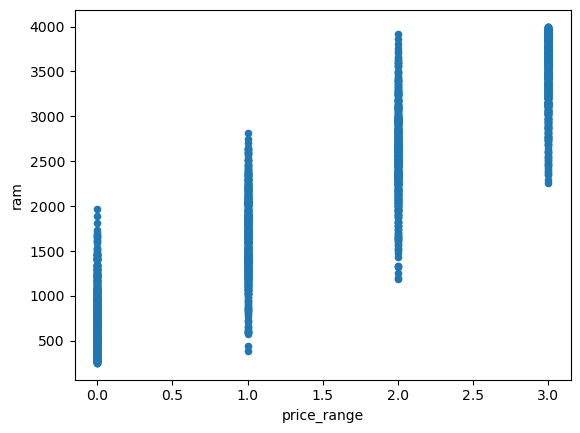

In [21]:
train_df.plot(x='price_range',y='ram',kind='scatter')
plt.show()

<Axes: >

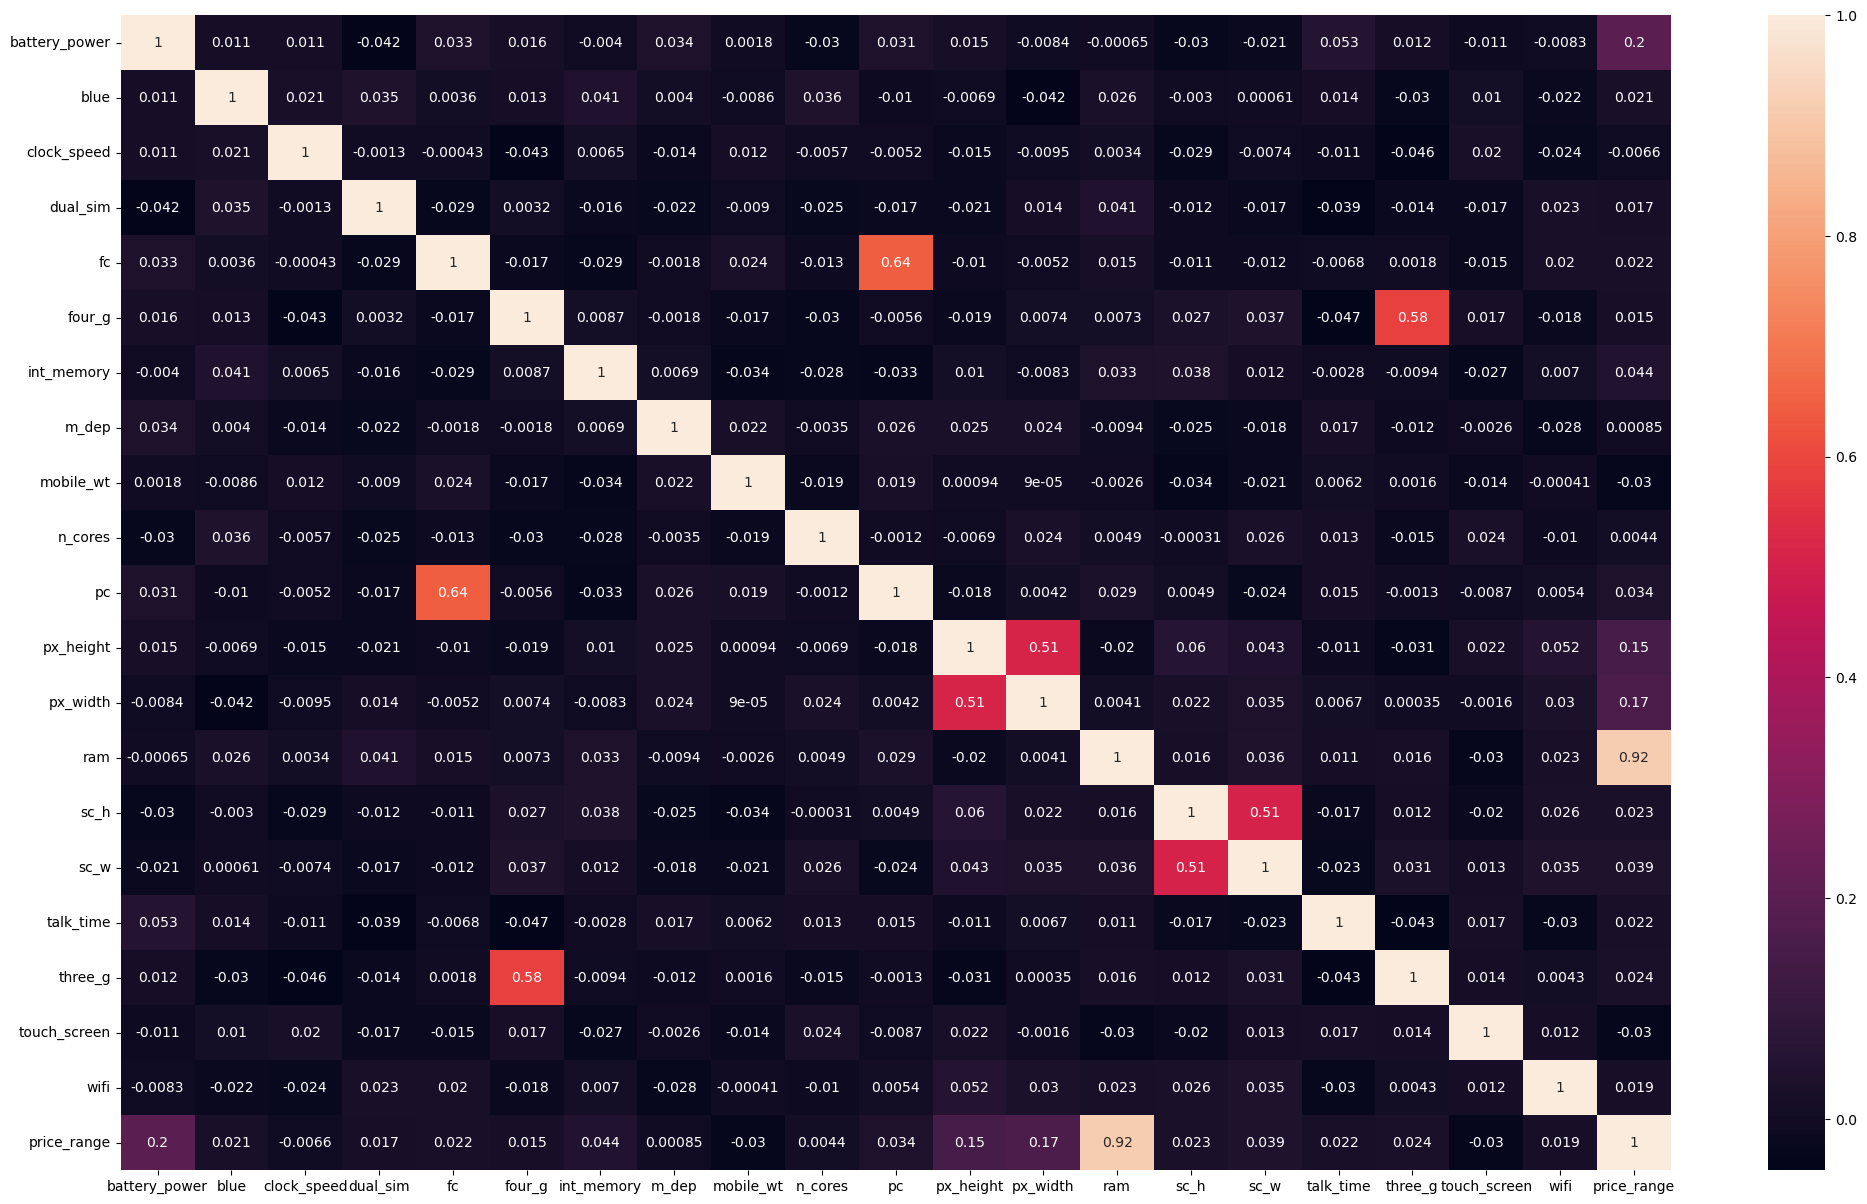

In [35]:
plt.figure(figsize=(25,15))
sns.heatmap(train_df.corr(),annot=True)

<Axes: xlabel='price_range', ylabel='battery_power'>

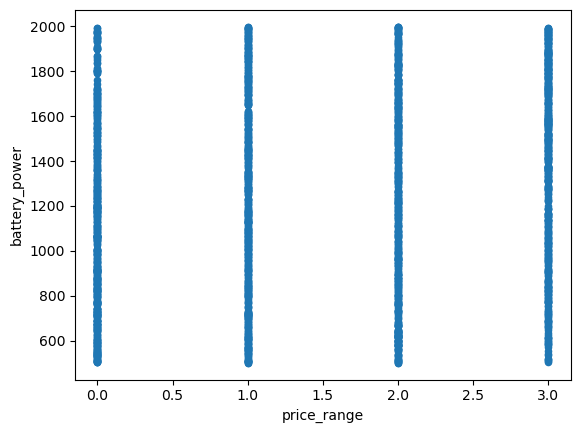

In [37]:
train_df.plot(x='price_range',y='battery_power',kind='scatter')

<Axes: xlabel='price_range', ylabel='px_height'>

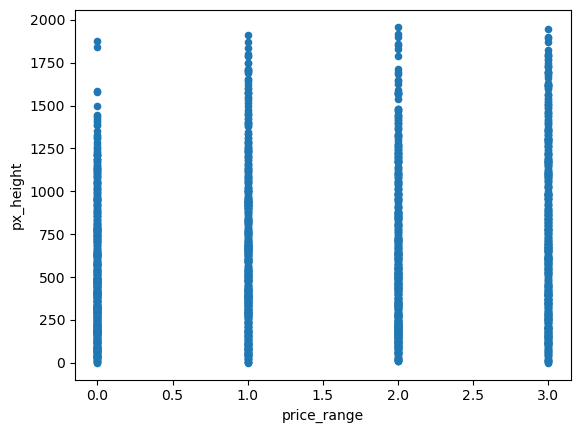

In [38]:
train_df.plot(x='price_range',y='px_height',kind='scatter')

<Axes: >

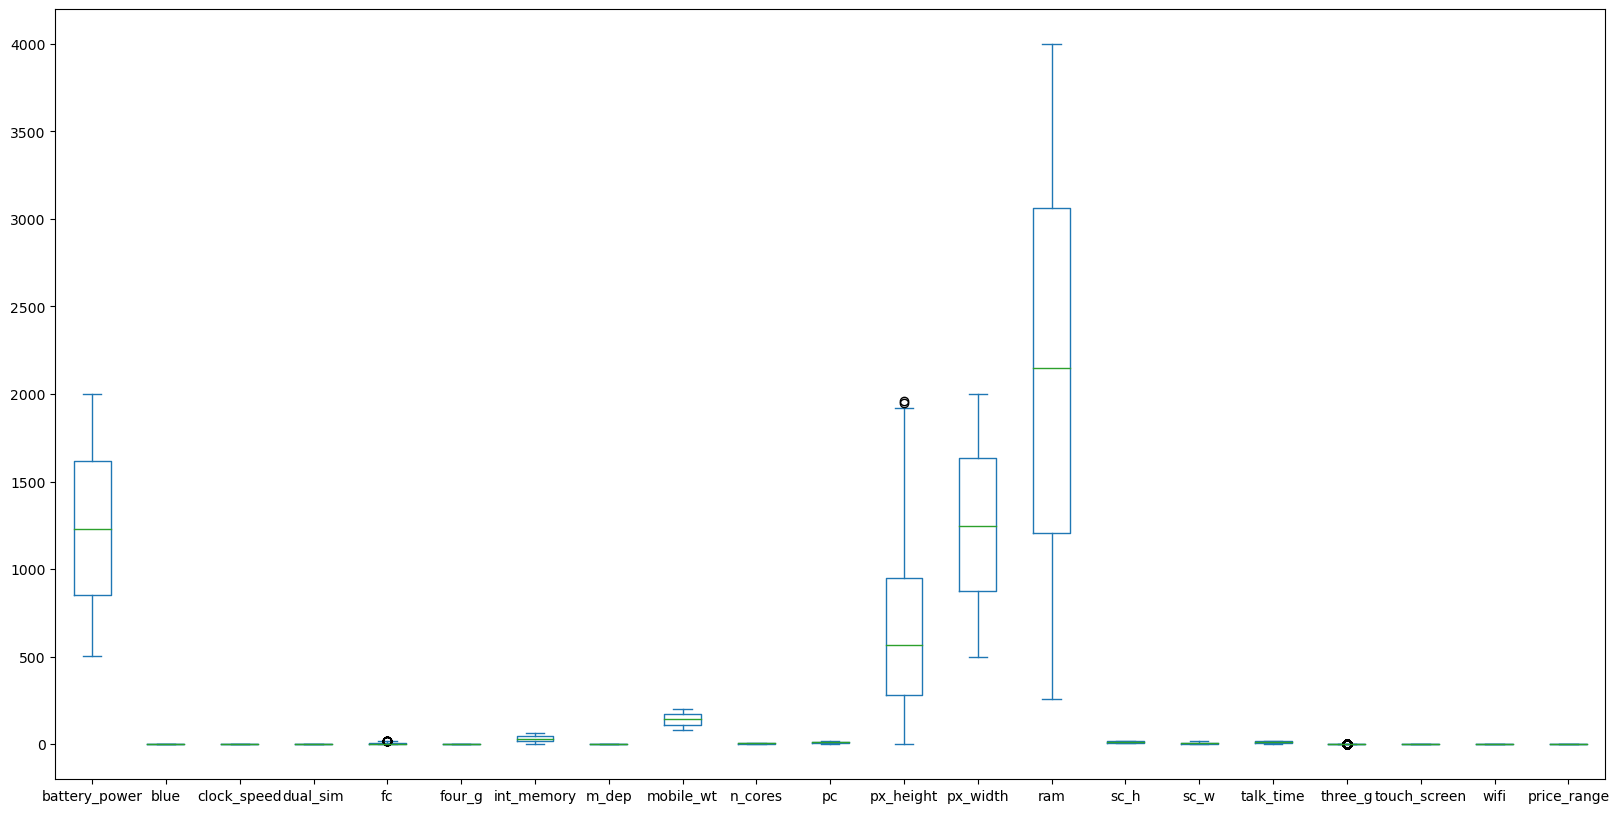

In [40]:
train_df.plot(kind='box',figsize=(20,10))

In [41]:
X=train_df.drop('price_range',axis=1)
y=train_df['price_range']

In [43]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [45]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)
test=s.transform(test)

In [46]:
X_train.shape

(1600, 20)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix

In [63]:
models={
    'DecisionTreeClaasifier':DecisionTreeClassifier(),
    'SVC':SVC(),
    'LogisticRegression':LogisticRegression()
}
model_list=[]
accuracy_list=[]

In [64]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    pred=model.predict(X_test)
    acc_sc=accuracy_score(pred,y_test)
    con=confusion_matrix(pred,y_test)
    print(list(models.values())[i])
    model_list.append(list(models.keys())[i])
    
    print('Evaluation')
    
    print(f'Accuracy_score:{acc_sc}')
    print(f'Confusion_matrix:{con}')
    accuracy_list.append(acc_sc)
    print("*"*30)
    print('\n')

DecisionTreeClassifier()
Evaluation
Accuracy_score:0.8125
Confusion_matrix:[[89 15  0  0]
 [10 76 11  0]
 [ 0 17 64 10]
 [ 0  0 12 96]]
******************************


SVC()
Evaluation
Accuracy_score:0.9625
Confusion_matrix:[[ 96   1   0   0]
 [  3 106   5   0]
 [  0   1  78   1]
 [  0   0   4 105]]
******************************


LogisticRegression()
Evaluation
Accuracy_score:0.6525
Confusion_matrix:[[83 26  0  0]
 [15 53 16  0]
 [ 1 25 44 25]
 [ 0  4 27 81]]
******************************




C:\Users\Ragavi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
model=LogisticRegression()
model.fit(X_train,y_train)
test_pred=model.predict(test_df)


C:\Users\Ragavi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
test_pred

array([2, 3, 2, 3, 2, 2, 3, 1, 3, 0, 3, 2, 0, 0, 2, 0, 1, 1, 2, 2, 0, 3,
       1, 2, 3, 0, 2, 0, 3, 1, 2, 0, 3, 0, 0, 1, 3, 2, 3, 3, 0, 2, 0, 0,
       0, 1, 1, 3, 1, 2, 3, 0, 2, 0, 3, 0, 3, 1, 0, 3, 3, 3, 1, 1, 0, 2,
       1, 3, 1, 1, 1, 2, 2, 2, 2, 0, 3, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 1, 2, 2, 2, 0, 2, 3, 0, 2, 1, 3, 2, 0, 0, 2, 2, 1, 1, 1, 3, 2,
       3, 2, 1, 3, 3, 2, 3, 1, 3, 0, 0, 3, 3, 1, 1, 0, 3, 3, 2, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 2, 2, 1, 2, 3, 3, 3, 3, 1, 3, 2, 3, 1, 0,
       2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 2,
       1, 0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 3,
       3, 3, 1, 3, 2, 3, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 2, 3, 1, 3, 0, 3,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 0,
       0, 3, 0, 3, 2, 3, 1, 1, 3, 0, 0, 2, 2, 3, 1, 3, 1, 1, 3, 3, 2, 3,
       3, 3, 3, 2, 0, 2, 1, 2, 2, 1, 3, 2, 0, 3, 0, 2, 1, 0, 0, 3, 2, 2,
       3, 2, 0, 3, 3, 1, 2, 1, 2, 1, 1, 0, 2, 3, 1,